# Potentially disease-causing variants

This analysis aimed to answer the following research questions: 

1. How many of the variants identified in African populations have known/predicted disease associations, and what are these associations?
2. What are the frequencies of the variants with known/predicted disease associations?
3. Have any of the variants with known/predicted disease associations been associated with NESHIE previously?

To achieve this, the following steps were performed:

1. ...

## Imports

Import relevant libraries and packages

In [273]:
import os
import sys
import warnings

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

Turn off warning notifications

In [274]:
# Ignore all warnings
warnings.filterwarnings("ignore")

## Data loading

Load processed variant phenotype data from the `Data/Processed/Variant_disease_phenotypes.csv` file. This file includes the following phenotype data in each column:

* `VariantVcf`: Variant call format identifier, representing the variant in the VCF file.
* `Rsid`: Reference SNP ID from the dbSNP database.
* `Clndn`: Clinical significance or disease name associated with the variant.
* `CHROM`: Chromosome number where the variant is located.
* `POS`: Position of the variant on the chromosome.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `ID`: Unique identifier for the variant, often a combination of position, reference allele, and alternate allele.

In [275]:
# Load the data into a DataFrame
phenotype_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Variant_disease_phenotypes.csv",
    )
)

# Remove unnecessary columns
phenotype_data.drop(columns=['VariantVcf', 'Rsid', 'CHROM', 'ID'], inplace=True)

# View the first 5 data entries
phenotype_data.head(5)

,Clndn,POS,REF,ALT
0,NaN,110148917,C,G
1,NaN,110148891,C,G
2,NaN,110149494,C,T
3,NaN,110149715,AAT,A
4,NaN,110151168,C,T


Load the processed African variant count data from the `Data/Processed/IH_allele_counts.csv` file. This file includes the following information:

* `ID`: A unique variant identifier.
* `VAR_NAME`: The non-unique name of the variant.
* `POS`: The nucleotide position at which the genetic variant is located within the genome.
* `ALT` and `REF`: An allele refers to the different forms of a specific variant that can exist at a particular genetic position. For each variant, there are two alleles, the normal form known as the reference allele (REF), and the altered form known as the alternate allele (ALT). These alleles define the genetic variation at a given position.
* `GENE`: The gene in which the variant is located.
* `SUB_POP`: The African ethnolinguistic subpopulation from which the genetic data sample originated.
* `IH_ALT_CTS`: This shows how many times each genetic variant's alternate allele (ALT) appears in all the samples of a population.
* `IH_TOTAL_CTS`: This provides the overall count of all genetic variants' alleles (both REF and ALT) mentioned in the data.
* `IH_REF_CTS`: This shows how many times each genetic variant's reference allele form (REF) appears in all the samples of a population.
* `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)
* `IH_AF`: The frequency of the variant's alternate allele in all samples of the population.
* `VARIANT_TYPE`: The type of variant. The possible types are:
    - INDEL
    - SNP

In [276]:
# Load the data into a DataFrame
ih_afr = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
)

# Remove unnecessary columns
ih_afr.drop(columns=['IH_REF_CTS', 'IH_TOTAL_CTS'], inplace=True)

# View the first 5 data entries
ih_afr.head(5)

,ID,VAR_NAME,VARIANT_TYPE,CHROM,POS,REF,ALT,GENE,SUB_POP,REG,IH_ALT_CTS,IH_AF
0,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Bantu Kenya,EA,0,0.0
1,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Yoruba,WA,0,0.0
2,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,San,SA,0,0.0
3,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mende,WA,0,0.0
4,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,0,0.0


Load the processed variant count data from ALFA on European, Asian and Latin American from the `Data/Processed/ALFA_allele_counts.csv` file. The file contains the following information:

* `VAR_NAME`: Name or identifier of the genetic variant.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `ALT_CT_ALFA_East Asian`: Count of the alternate allele in the East Asian population (ALFA database).
* `ALT_CT_ALFA_European`: Count of the alternate allele in the European population (ALFA database).
* `ALT_CT_ALFA_Latin American 1`: Count of the alternate allele in the Latin American 1 population (ALFA database).
* `ALT_CT_ALFA_Latin American 2`: Count of the alternate allele in the Latin American 2 population (ALFA database).
* `ALT_CT_ALFA_South Asian`: Count of the alternate allele in the South Asian population (ALFA database).
* `REF_CT_ALFA_East Asian`: Count of the reference allele in the East Asian population (ALFA database).
* `REF_CT_ALFA_European`: Count of the reference allele in the European population (ALFA database).
* `REF_CT_ALFA_Latin American 1`: Count of the reference allele in the Latin American 1 population (ALFA database).
* `REF_CT_ALFA_Latin American 2`: Count of the reference allele in the Latin American 2 population (ALFA database).
* `REF_CT_ALFA_South Asian`: Count of the reference allele in the South Asian population (ALFA database).

In [277]:
# Load the data into a DataFrame
alfa_global = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts.csv",
    )
)

# View the first 5 data entries
alfa_global.head(5)

,VAR_NAME,REF,ALT,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
0,rs1000343,C,T,0.0,49.0,5.0,10.0,0.0,490.0,109377.0,673.0,2200.0,184.0
1,rs1000989,T,C,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0
2,rs1000990,T,C,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0
3,rs1005573,C,T,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0
4,rs1007311,A,G,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0


Load processed variant effect data from the `Data/Processed/Variant_effects.csv` file. The file contains the following information:

* `CHROM`: Chromosome number where the variant is located.
* `POS`: Genomic position of the variant.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `GENE`: Name of the gene affected by the variant.
* `POLYPHEN_PRED`: PolyPhen prediction category (e.g., benign, possibly damaging).
* `POLYPHEN_SCORE`: PolyPhen score indicating the probability of impact.
* `SIFT_PRED`: SIFT prediction category (e.g., tolerated, deleterious).
* `SIFT_SCORE`: SIFT score indicating the impact on protein function.
* `CADD_RAW_SCORE`: Raw CADD score assessing the variant's potential impact.
* `CADD_PHRED_SCORE`: CADD PHRED score providing a normalized rank of the variant's impact.

In [278]:
# Load the data into a DataFrame
vep_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Variant_effects.csv",
    )
)

# Remove unnecessary columns
vep_data.drop(columns=['POLYPHEN_PRED', 'POLYPHEN_SCORE', 'SIFT_PRED', 'SIFT_SCORE'], inplace=True)

# View the first 5 data entries
vep_data.head(5)

,CHROM,POS,REF,ALT,GENE,CADD_RAW_SCORE,CADD_PHRED_SCORE,ID
0,13,110148882,C,CT,COL4A1,-0.437825,0.160,110148882_C_CT
1,13,110148891,C,G,COL4A1,-0.227221,0.446,110148891_C_G
2,13,110148917,C,G,COL4A1,0.269936,3.938,110148917_C_G
3,13,110148920,G,C,COL4A1,0.530972,6.825,110148920_G_C
4,13,110148959,A,G,COL4A1,1.380228,14.950,110148959_A_G


Import a list of variants with rsIDs that have statistically-significant associations with NESHIE reported in the public domain. This information was retrieved from: https://doi.org/10.1016/j.ygeno.2022.110508.

In [279]:
hie_variant_rsids = constants.HIE_VARIANT_RSIDS
hie_variant_rsids

['rs2067853',
 'rs1217401',
 'rs2043211',
 'rs1001179',
 'rs1800896',
 'rs1071676',
 'rs1143623',
 'rs16944',
 'rs1800795',
 'rs1801133',
 'rs1808593',
 'rs2070744',
 'rs6517135',
 'rs1799964']

## Data Merging


Merge the data from all sources into a single DataFrame to facilitate ease of downstream analysis.

In [280]:
# Start by merging the African allele count and phenotype data
merged_data = (
    ih_afr.merge(
        phenotype_data,
        how="left",
        left_on=["REF", "ALT", "POS"],
        right_on=["REF", "ALT", "POS"],
    )
)

# Include the effect prediction data
merged_data = merged_data.merge(vep_data, how='left', on=['ID','CHROM','POS','REF','ALT','GENE'])

# Include the ALFA global allele count data
merged_data = merged_data.merge(alfa_global, )

merged_data.head(5)

,ID,VAR_NAME,VARIANT_TYPE,CHROM,POS,REF,ALT,GENE,SUB_POP,REG,IH_ALT_CTS,IH_AF,Clndn,CADD_RAW_SCORE,CADD_PHRED_SCORE
0,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Bantu Kenya,EA,0,0.0,NaN,-0.437825,0.16
1,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Yoruba,WA,0,0.0,NaN,-0.437825,0.16
2,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,San,SA,0,0.0,NaN,-0.437825,0.16
3,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mende,WA,0,0.0,NaN,-0.437825,0.16
4,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,0,0.0,NaN,-0.437825,0.16


In [200]:
ih_afr_subpops_phenotype_data = (
    ih_afr.merge(
        phenotype_data,
        how="left",
        left_on=["REF", "ALT", "POS"],
        right_on=["REF", "ALT", "POS"],
    )
)

In [201]:
# Remove variants with an alternate allele count of 0, as these variants are not present in Recent Africans
ih_afr_agg = ih_afr[(ih_afr["REG"] == "Recent African") & (ih_afr["IH_ALT_CTS"] > 0)]

# Merge the selected Recent African data with phenotype data to information on the associated disease phenotypes of these variants
ih_afr_subpops_phenotype_data = (
    ih_afr_agg.merge(
        phenotype_data,
        how="left",
        left_on=["REF", "ALT", "POS"],
        right_on=["REF", "ALT", "POS"],
    )
)

# Display the first 5 rows of the merged DataFrame to verify the results
ih_afr_subpops_phenotype_data.head(5)

,ID,VAR_NAME,VARIANT_TYPE,POS,REF,ALT,GENE,SUB_POP,REG,IH_ALT_CTS,IH_AF,Clndn,CHROM
0,110148891_C_G,rs552586867,SNP,110148891,C,G,COL4A1,NaN,Recent African,1,0.000820,NaN,13.0
1,110148917_C_G,rs59409892,SNP,110148917,C,G,COL4A1,NaN,Recent African,119,0.097541,NaN,13.0
2,110149176_T_A,rs546124548,SNP,110149176,T,A,COL4A1,NaN,Recent African,1,0.000820,NaN,13.0
3,110149349_G_A,rs139916479,SNP,110149349,G,A,COL4A1,NaN,Recent African,5,0.004098,Brain_small_vessel_disease_1_with_or_without_o...,13.0
4,110149494_C_T,rs552877576,SNP,110149494,C,T,COL4A1,NaN,Recent African,1,0.000820,NaN,13.0


## Data selection

Select relevant data for downstream analysis. 

For analysis that will involve data on each individual ethnolinguistic subpopulation, select subpopulation data.

For analysis that will involve aggregated data on Recent Africans as a whole, select Recent African data.

## Analysis and Visualisation

### How many variants have previously been associated with HIE and are present in Africans?

How many HIE-associated variants with rsids are there?

In [202]:
len(hie_variant_rsids)

14

Which of these variants are present in Africans?

In [203]:
variants_with_hie_assoc = ih_afr_subpops_phenotype_data[ih_afr_subpops_phenotype_data.VAR_NAME.isin(hie_variant_rsids)]
variants_with_hie_assoc.VAR_NAME.unique()

array(['rs1071676', 'rs1217401', 'rs1801133', 'rs2070744', 'rs1808593',
       'rs1800896', 'rs1800795', 'rs2067853', 'rs2043211'], dtype=object)

How many of the variants are present in Africans?

In [204]:
variants_with_hie_assoc.VAR_NAME.nunique()

9

### How many variants have a known ClinVar disease phenotype?

In [205]:
# Split the phenotypes listed in each row of the Clndn column into a list

ih_afr_subpops_phenotype_data['Clndn'] = ih_afr_subpops_phenotype_data['Clndn'].str.split('|')

In [206]:
# Convert the phenotypes list into multiple rows

ih_afr_subpops_phenotype_explode = ih_afr_subpops_phenotype_data.explode('Clndn')

In [207]:
# Remove rows with missing data for the Clndn column

variants_with_ClinVar_phenotypes = ih_afr_subpops_phenotype_explode[~((ih_afr_subpops_phenotype_explode['Clndn'].isna()) | (ih_afr_subpops_phenotype_explode['Clndn'] == 'not_provided') | (ih_afr_subpops_phenotype_explode['Clndn'] == 'not_specified') | (ih_afr_subpops_phenotype_explode['Clndn'] == 'not_specified|not_provided') | (ih_afr_subpops_phenotype_explode['Clndn'] == 'none_provided'))]

In [208]:
# Count the number of variants with disease phenotype descriptions

variants_with_ClinVar_phenotypes['ID'].nunique()

133

In [209]:
variants_with_ClinVar_phenotypes[variants_with_ClinVar_phenotypes.VAR_NAME.isin(hie_variant_rsids)].ID.nunique()

5

In [210]:
variants_with_known_phenotypes_grouped_by_gene = variants_with_ClinVar_phenotypes[['GENE','Clndn','ID']].groupby(['GENE','Clndn']).count().reset_index().sort_values(by=['GENE','ID'], ascending=True)
variants_with_known_phenotypes_grouped_by_gene.rename(columns={'ID':'Count'}, inplace=True)

variants_with_known_phenotypes_grouped_by_gene

,GENE,Clndn,Count
0,AGT,"Hypertension,_essential,_susceptibility_to",1
1,AGT,"Preeclampsia,_susceptibility_to",1
3,AGT,Susceptibility_to_progression_to_renal_failure...,1
2,AGT,Renal_dysplasia,22
4,AP4B1,History_of_neurodevelopmental_disorder,7
5,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",10
9,COL4A1,Porencephalic_cyst,17
8,COL4A1,Brain_small_vessel_disease_with_hemorrhage,27
7,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,39
6,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",41


In [211]:
# Concatenate information on variants with known ClinVar phenotypes and HIE associations. Drop duplicate information.

variants_with_known_phenotypes = pd.concat([variants_with_ClinVar_phenotypes, variants_with_hie_assoc]).drop_duplicates()

variants_with_known_phenotypes.VAR_NAME.nunique()

138

### How many of the variants with known disease phenotypes (ClinVar and HIE studies) have predicted deleteriousness (CADD>=10)?

In [212]:
# Join the phenotype and cadd data

variants_phenotypes_and_cadd_phred = pd.merge(variants_with_known_phenotypes, vep_data, how='left', on=['ID','CHROM','POS','REF','ALT','GENE'])

In [213]:
# Filter for variants with cadd >=10

deleterious_variants_with_known_phenotype = variants_phenotypes_and_cadd_phred[variants_phenotypes_and_cadd_phred.CADD_PHRED_SCORE >= 10]

In [214]:
# Count the number of variants with known disease phenotypes and cadd >= 10

deleterious_variants_with_known_phenotype.ID.nunique()

41

In [215]:
# Percentage of variants with known disease phenotypes and cadd >= 10 of the variants with known disease phenotypes

(deleterious_variants_with_known_phenotype.ID.nunique()/variants_with_known_phenotypes['ID'].nunique())*100

29.927007299270077

What phenotypes are represented in the variants with cadd scores >= 10?

In [216]:
deleterious_variants_with_known_phenotype_grouped_by_gene = deleterious_variants_with_known_phenotype[['GENE','Clndn','ID']].groupby(['GENE','Clndn']).count().reset_index().sort_values(by=['GENE','ID'], ascending=True)
deleterious_variants_with_known_phenotype_grouped_by_gene.rename(columns={'ID':'Count'}, inplace=True)

deleterious_variants_with_known_phenotype_grouped_by_gene

,GENE,Clndn,Count
0,AGT,Renal_dysplasia,5
3,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive|His...",1
1,AP4B1,History_of_neurodevelopmental_disorder,5
2,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",7
6,COL4A1,Brain_small_vessel_disease_with_hemorrhage,3
5,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,5
7,COL4A1,Porencephalic_cyst,5
4,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",6
8,IL10,Inflammatory_bowel_disease,5
9,IL1B,Gastric_cancer_susceptibility_after_h._pylori_...,1


In [217]:
deleterious_variants_with_known_phenotype[deleterious_variants_with_known_phenotype.VAR_NAME.isin(hie_variant_rsids)].ID.nunique()

3

In [218]:
deleterious_variants_with_known_phenotype[deleterious_variants_with_known_phenotype.VAR_NAME.isin(hie_variant_rsids)].VAR_NAME.unique()

array(['rs1217401', 'rs1801133', 'rs1800795'], dtype=object)

### What are the known phenotypes of the variants with cadd phred scores >= 10 and common frequencies (>=0.1)?

In [219]:
# Display common variants, and their associated clinical disease phenotype

common_deleterious_variants_with_known_phenotype = deleterious_variants_with_known_phenotype[deleterious_variants_with_known_phenotype.IH_AF>=0.1][['GENE','Clndn','ID','VAR_NAME','REF','ALT','IH_AF','CADD_PHRED_SCORE']].sort_values(by=['GENE','Clndn','ID'], ascending=True)
common_deleterious_variants_with_known_phenotype

,GENE,Clndn,ID,VAR_NAME,REF,ALT,IH_AF,CADD_PHRED_SCORE
128,AP4B1,History_of_neurodevelopmental_disorder,113896329_A_G,rs1217401,A,G,0.797541,21.90
127,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113896329_A_G,rs1217401,A,G,0.797541,21.90
267,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive|His...",113896329_A_G,rs1217401,A,G,0.797541,21.90
8,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110149776_G_T,rs13260,G,T,0.266393,11.67
83,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110205548_A_G,rs677877,A,G,0.388060,10.31
119,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110307009_C_G,rs9515185,C,G,0.216172,13.89
123,COL4A1,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",110307117_C_A,rs113651836,C,A,0.107084,14.63
7,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110149776_G_T,rs13260,G,T,0.266393,11.67
82,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110205548_A_G,rs677877,A,G,0.388060,10.31
118,COL4A1,Brain_small_vessel_disease_1_with_or_without_o...,110307009_C_G,rs9515185,C,G,0.216172,13.89


In [220]:
# Count the number of variants with known phenotypes, CADD >=10 and that are common

common_deleterious_variants_with_known_phenotype.ID.nunique()

10

### How do the frequencies of the common variants with known phenotypes and CADD Phred scores in Africans >=10 compare to that of other global populations?

In [221]:
# Add ALFA global allele count data to African data in common_deleterious_variants_with_known_phenotype dataframe

common_deleterious_variants_with_known_phenotype_incl_alfa = pd.merge(common_deleterious_variants_with_known_phenotype.drop_duplicates(subset=['VAR_NAME','REF','ALT']).drop(columns=['Clndn','ID','CADD_PHRED_SCORE']), alfa_global, how='left', on=['VAR_NAME','REF','ALT'])

In [222]:
# Calculate the alternate allele frequencies for the global populations

common_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_East Asian'] = common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']/(common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']+common_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_East Asian'])
common_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_South Asian'] = common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']/(common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']+common_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_South Asian'])
common_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_European'] = common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']/(common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']+common_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_European'])
common_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 1'] = common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']/(common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']+common_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 1'])
common_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 2'] = common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']/(common_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']+common_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 2'])

common_deleterious_variants_with_known_phenotype_incl_alfa.drop(columns=['ALT_CT_ALFA_East Asian','ALT_CT_ALFA_South Asian','ALT_CT_ALFA_European','ALT_CT_ALFA_Latin American 1','ALT_CT_ALFA_Latin American 2','REF_CT_ALFA_East Asian','REF_CT_ALFA_South Asian','REF_CT_ALFA_European','REF_CT_ALFA_Latin American 1','REF_CT_ALFA_Latin American 2'], inplace=True)
common_deleterious_variants_with_known_phenotype_incl_alfa

,GENE,VAR_NAME,REF,ALT,IH_AF,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2
0,AP4B1,rs1217401,A,G,0.797541,0.057899,0.327415,0.321924,0.419217,0.192529
1,COL4A1,rs13260,G,T,0.266393,0.004016,0.039773,0.091209,0.130312,0.226508
2,COL4A1,rs677877,A,G,0.388060,0.758065,0.660000,0.641808,0.613095,0.550746
3,COL4A1,rs9515185,C,G,0.216172,0.488372,0.489796,0.406679,0.493151,0.372131
4,COL4A1,rs113651836,C,A,0.107084,0.026316,0.000000,0.197838,0.000000,0.000000
5,IL10,rs1518111,T,C,0.555738,0.295049,0.603571,0.784843,0.734914,0.661386
6,IL1B,rs1143627,G,A,0.351639,0.505700,0.415344,0.664999,0.585017,0.445177
7,IL6,rs1800795,C,G,0.999180,1.000000,0.857143,0.559989,0.828767,0.819672
8,MTHFR,rs1801131,T,G,0.145902,0.214497,0.410439,0.314106,0.219092,0.192032
9,NOS3,rs1799983,T,G,0.935246,0.857143,0.333333,0.679167,0.763889,0.240000


### Generate a barplot visualising the global frequency differences of common variants with known phenotypes and deleterious CADD scores 

Unpivot relevant columns to prepare data for plotting

In [223]:
common_variants_with_known_phenotype_scatter_data = common_deleterious_variants_with_known_phenotype_incl_alfa.melt(id_vars=['VAR_NAME'], value_vars=['IH_AF', 'ALFA_AF_European', 'ALFA_AF_East Asian', 'ALFA_AF_South Asian', 'ALFA_AF_Latin American 1', 'ALFA_AF_Latin American 2'], var_name='POP', value_name='AF').replace({'IH_AF':'AFR', 'ALFA_AF_European':'EUR', 'ALFA_AF_East Asian':'EAS', 'ALFA_AF_South Asian':'SAS', 'ALFA_AF_Latin American 1':'AMR1', 'ALFA_AF_Latin American 2':'AMR2'})
common_variants_with_known_phenotype_scatter_data.head(5)

,VAR_NAME,POP,AF
0,rs1217401,AFR,0.797541
1,rs13260,AFR,0.266393
2,rs677877,AFR,0.388060
3,rs9515185,AFR,0.216172
4,rs113651836,AFR,0.107084


Set plot parameters

In [224]:
sns.set(rc={"figure.figsize": (10, 8)}) # Set plot figure size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Generate scatterplot with variant name on x-axis and allele frequency on y-axis for each population group.

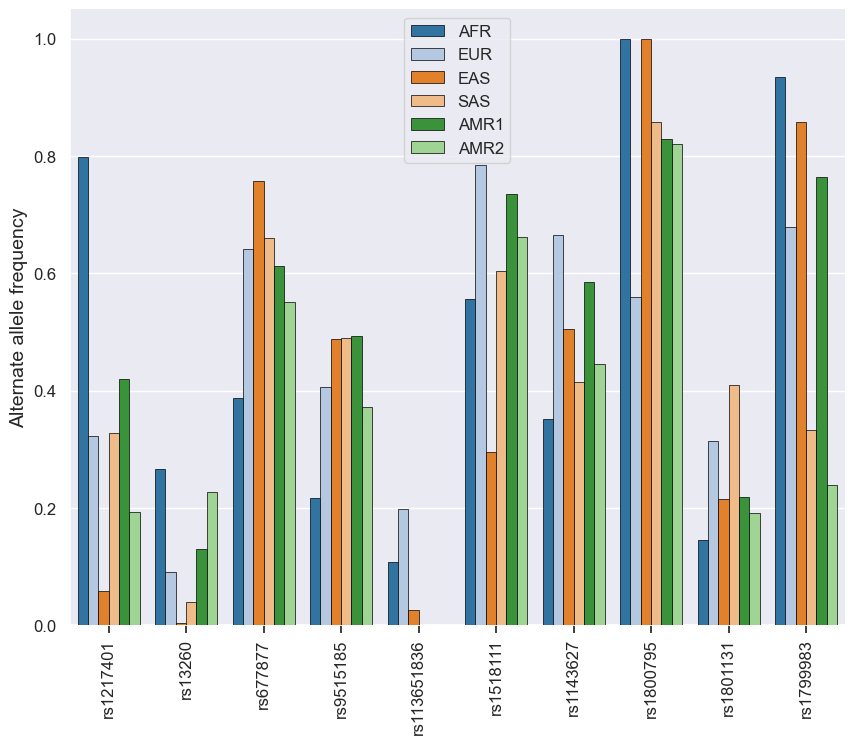

In [225]:
palette = sns.set_palette("tab20", 6)

phenotype_variants_scatterplot = sns.barplot(
    data=common_variants_with_known_phenotype_scatter_data,
    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100
)
sns.despine()

plt.tick_params(bottom='on')
plt.xticks(rotation=90)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel='Alternate allele frequency')
plt.legend(title = None)

plt.savefig(
    "..\Results\Figures\Common_disease_causing_global_freq.png", dpi=1200, bbox_inches="tight"
)
plt.show()

### What are the frequencies of the common variants with known phenotypes and CADD Phred scores >=10 in each African ethnolinguistic population group?

In [226]:
# Get a list of variants to get frequencies for.

common_deleterious_variants_with_known_phenotype_list = list(common_deleterious_variants_with_known_phenotype.ID.unique())

In [227]:
# Extract ethnolinguistic population frequencies for each of these variants. 

ih_afr_subpops_common_deleterious_variants = ih_afr[(ih_afr.ID.isin(common_deleterious_variants_with_known_phenotype_list)) & ~ (ih_afr.REG == 'Recent African')]

In [228]:
# Filter out irrelevant data. Pivot data.

ih_afr_subpops_common_deleterious_variants_filtered = ih_afr_subpops_common_deleterious_variants.drop(columns=['POS','REF','ALT','IH_ALT_CTS','VARIANT_TYPE','REG'])
ih_afr_subpops_common_deleterious_variants_filtered = ih_afr_subpops_common_deleterious_variants_filtered.pivot(index=['VAR_NAME'], columns=['SUB_POP'], values=['IH_AF']).reset_index()

In [229]:
# Drop dataframe level

ih_afr_subpops_common_deleterious_variants_filtered.columns = ih_afr_subpops_common_deleterious_variants_filtered.columns.get_level_values(1)

# Rename column

ih_afr_subpops_common_deleterious_variants_filtered = ih_afr_subpops_common_deleterious_variants_filtered.rename(columns={'':'VAR_NAME'})

In [230]:
# Add overall African frequencies

ih_afr_subpops_rare_deleterious_variants_filtered = pd.merge(left=common_deleterious_variants_with_known_phenotype_incl_alfa[['VAR_NAME','IH_AF']], right=ih_afr_subpops_common_deleterious_variants_filtered, how='left', on=['VAR_NAME'])
ih_afr_subpops_rare_deleterious_variants_filtered

,VAR_NAME,IH_AF,Bantu Kenya,Bantu South Africa,Biaka Pygmy,Esan,Luhya,Mandenka,Mandinka,Mbuti Pygmy,Mende,San,Yoruba
0,rs1217401,0.797541,0.75,0.812500,0.568182,0.815534,0.788043,0.950000,0.831897,0.291667,0.777108,0.666667,0.840580
1,rs13260,0.266393,0.40,0.312500,0.454545,0.271845,0.320652,0.150000,0.206897,0.166667,0.265060,0.000000,0.271739
2,rs677877,0.388060,0.55,0.285714,0.318182,0.388350,0.384615,0.550000,0.448276,0.041667,0.353659,0.166667,0.380597
3,rs9515185,0.216172,0.15,0.125000,0.204545,0.169903,0.157609,0.236842,0.327586,0.458333,0.265060,0.200000,0.154412
4,rs113651836,0.107084,0.05,0.000000,0.090909,0.169903,0.097826,0.131579,0.081897,0.041667,0.066265,0.000000,0.131387
5,rs1518111,0.555738,0.70,0.687500,0.681818,0.533981,0.608696,0.450000,0.534483,0.750000,0.512048,0.916667,0.525362
6,rs1143627,0.351639,0.30,0.187500,0.340909,0.359223,0.277174,0.550000,0.426724,0.333333,0.319277,0.166667,0.347826
7,rs1800795,0.999180,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,0.995690,1.000000,1.000000,1.000000,1.000000
8,rs1801131,0.145902,0.10,0.250000,0.386364,0.135922,0.184783,0.025000,0.120690,0.166667,0.138554,0.333333,0.119565
9,rs1799983,0.935246,0.90,1.000000,0.931818,0.898058,0.961957,0.950000,0.922414,1.000000,0.951807,0.583333,0.952899


### Generate a barplot visualising the African ethnolinguistic group frequency differences of common variants with known phenotypes and deleterious CADD scores 

Unpivot relevant columns to prepare data for plotting

In [231]:
common_variants_with_known_phenotype_scatter_data_subpops = ih_afr_subpops_common_deleterious_variants_filtered.melt(id_vars=['VAR_NAME'], value_vars=ih_afr_subpops_common_deleterious_variants_filtered.iloc[:,4:].columns, var_name='POP', value_name='AF')
common_variants_with_known_phenotype_scatter_data_subpops.head(5)

,VAR_NAME,POP,AF
0,rs113651836,Esan,0.169903
1,rs1143627,Esan,0.359223
2,rs1217401,Esan,0.815534
3,rs13260,Esan,0.271845
4,rs1518111,Esan,0.533981


Generate scatterplot with variant name on x-axis and allele frequency on y-axis for each population group.

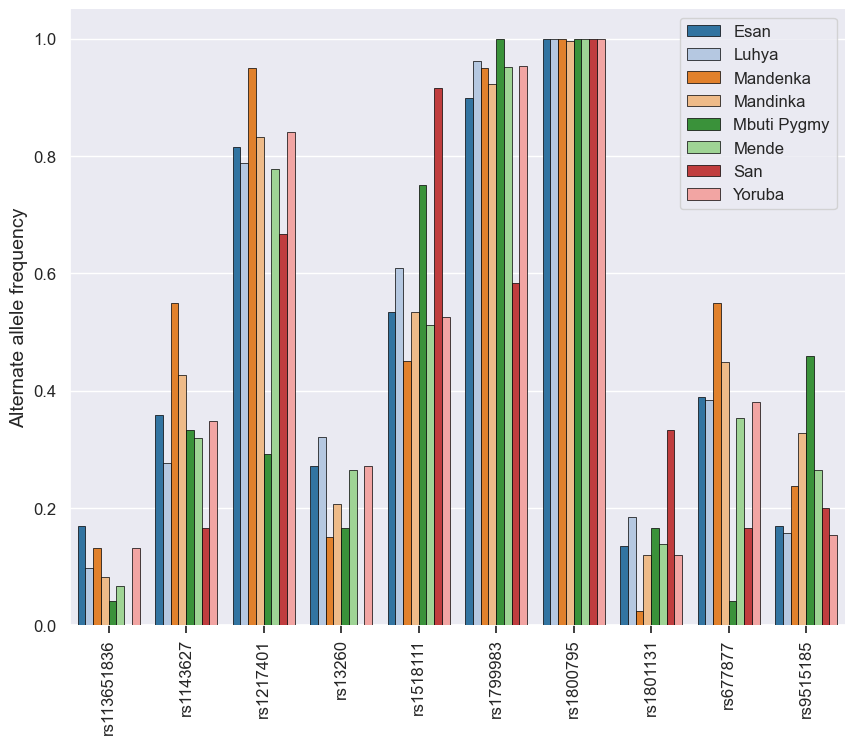

In [232]:
palette = sns.set_palette("tab20", 11)

phenotype_variants_scatterplot = sns.barplot(
    data=common_variants_with_known_phenotype_scatter_data_subpops,
    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100
)
sns.despine()

plt.tick_params(bottom='on')
plt.xticks(rotation=90)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel='Alternate allele frequency')
plt.legend(title = None)

plt.savefig(
    "..\Results\Figures\Common_disease_causing_subpop_freq.png", dpi=1200, bbox_inches="tight"
)
plt.show()

### What are the known phenotypes of the variants with cadd phred scores >= 10 and rare frequencies (<0.01)?

In [233]:
# Display rare variants, and their associated clinical disease phenotype

rare_deleterious_variants_with_known_phenotype = deleterious_variants_with_known_phenotype[deleterious_variants_with_known_phenotype.IH_AF<0.01][['GENE','Clndn','ID','VAR_NAME','REF','ALT','IH_AF','CADD_PHRED_SCORE']].sort_values(by=['GENE','Clndn','ID'], ascending=True)
rare_deleterious_variants_with_known_phenotype

,GENE,Clndn,ID,VAR_NAME,REF,ALT,IH_AF,CADD_PHRED_SCORE
248,AGT,Renal_dysplasia,230703157_G_A,rs143479528,G,A,0.004098,24.50
249,AGT,Renal_dysplasia,230703274_G_A,rs61751077,G,A,0.005738,23.50
250,AGT,Renal_dysplasia,230704308_A_G,rs61731499,A,G,0.006557,11.45
254,AGT,Renal_dysplasia,230706171_C_T,rs139685563,C,T,0.001639,22.90
129,AP4B1,History_of_neurodevelopmental_disorder,113897925_C_T,rs145803736,C,T,0.000820,25.90
132,AP4B1,History_of_neurodevelopmental_disorder,113900051_A_T,rs149335605,A,T,0.000820,22.00
134,AP4B1,History_of_neurodevelopmental_disorder,113900120_C_A,rs111785152,C,A,0.008197,20.70
126,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113895442_A_C,rs148748734,A,C,0.001639,12.93
131,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113900051_A_T,rs149335605,A,T,0.000820,22.00
133,AP4B1,"Spastic_paraplegia_47,_autosomal_recessive",113900120_C_A,rs111785152,C,A,0.008197,20.70


In [234]:
# Count the number of variants with known phenotypes, CADD >=10 and that are common

rare_deleterious_variants_with_known_phenotype.ID.nunique()

23

### How do the frequencies of the rare variants with known phenotypes and CADD Phred scores in Africans >=10 compare to that of other global populations?

In [235]:
# Add ALFA global allele count data to African data in rare_deleterious_variants_with_known_phenotype dataframe

rare_deleterious_variants_with_known_phenotype_incl_alfa = pd.merge(rare_deleterious_variants_with_known_phenotype.drop_duplicates(subset=['VAR_NAME','REF','ALT']).drop(columns=['Clndn','ID','CADD_PHRED_SCORE']), alfa_global, how='left', on=['VAR_NAME','REF','ALT'])

In [236]:
# Calculate the alternate allele frequencies for the global populations

rare_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_East Asian'] = rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']/(rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']+rare_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_East Asian'])
rare_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_South Asian'] = rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']/(rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']+rare_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_South Asian'])
rare_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_European'] = rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']/(rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']+rare_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_European'])
rare_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 1'] = rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']/(rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']+rare_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 1'])
rare_deleterious_variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 2'] = rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']/(rare_deleterious_variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']+rare_deleterious_variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 2'])

rare_deleterious_variants_with_known_phenotype_incl_alfa.drop(columns=['ALT_CT_ALFA_East Asian','ALT_CT_ALFA_South Asian','ALT_CT_ALFA_European','ALT_CT_ALFA_Latin American 1','ALT_CT_ALFA_Latin American 2','REF_CT_ALFA_East Asian','REF_CT_ALFA_South Asian','REF_CT_ALFA_European','REF_CT_ALFA_Latin American 1','REF_CT_ALFA_Latin American 2'], inplace=True)
rare_deleterious_variants_with_known_phenotype_incl_alfa

,GENE,VAR_NAME,REF,ALT,IH_AF,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2
0,AGT,rs143479528,G,A,0.004098,0.000000,0.000000,0.000006,0.000000,0.000000
1,AGT,rs61751077,G,A,0.005738,0.000000,0.000000,0.000013,0.000000,0.001053
2,AGT,rs61731499,A,G,0.006557,0.000000,0.000000,0.000026,0.004926,0.000000
3,AGT,rs139685563,C,T,0.001639,0.000000,0.000000,0.000509,0.001256,0.000000
4,AP4B1,rs145803736,C,T,0.000820,0.000000,0.000000,0.000033,0.000000,0.000000
5,AP4B1,rs149335605,A,T,0.000820,0.000000,0.000000,0.000000,0.000000,0.000000
6,AP4B1,rs111785152,C,A,0.008197,0.000000,0.000000,0.000010,0.003953,0.000000
7,AP4B1,rs148748734,A,C,0.001639,0.000000,0.000000,0.000000,0.000000,0.000000
8,AP4B1,rs143769705,T,C,0.000820,0.000000,0.000000,0.000000,0.000000,0.000000
9,COL4A1,chr13:110149715A-AAT,A,AAT,0.000825,NaN,NaN,NaN,NaN,NaN


### Generate a barplot visualising the global frequency differences of rare variants with known phenotypes and deleterious CADD scores 

Unpivot relevant columns to prepare data for plotting

In [237]:
rare_variants_with_known_phenotype_scatter_data = rare_deleterious_variants_with_known_phenotype_incl_alfa.melt(id_vars=['VAR_NAME'], value_vars=['IH_AF', 'ALFA_AF_European', 'ALFA_AF_East Asian', 'ALFA_AF_South Asian', 'ALFA_AF_Latin American 1', 'ALFA_AF_Latin American 2'], var_name='POP', value_name='AF').replace({'IH_AF':'AFR', 'ALFA_AF_European':'EUR', 'ALFA_AF_East Asian':'EAS', 'ALFA_AF_South Asian':'SAS', 'ALFA_AF_Latin American 1':'AMR1', 'ALFA_AF_Latin American 2':'AMR2'})
rare_variants_with_known_phenotype_scatter_data.head(5)

,VAR_NAME,POP,AF
0,rs143479528,AFR,0.004098
1,rs61751077,AFR,0.005738
2,rs61731499,AFR,0.006557
3,rs139685563,AFR,0.001639
4,rs145803736,AFR,0.000820


Generate scatterplot with variant name on x-axis and allele frequency on y-axis for each population group.

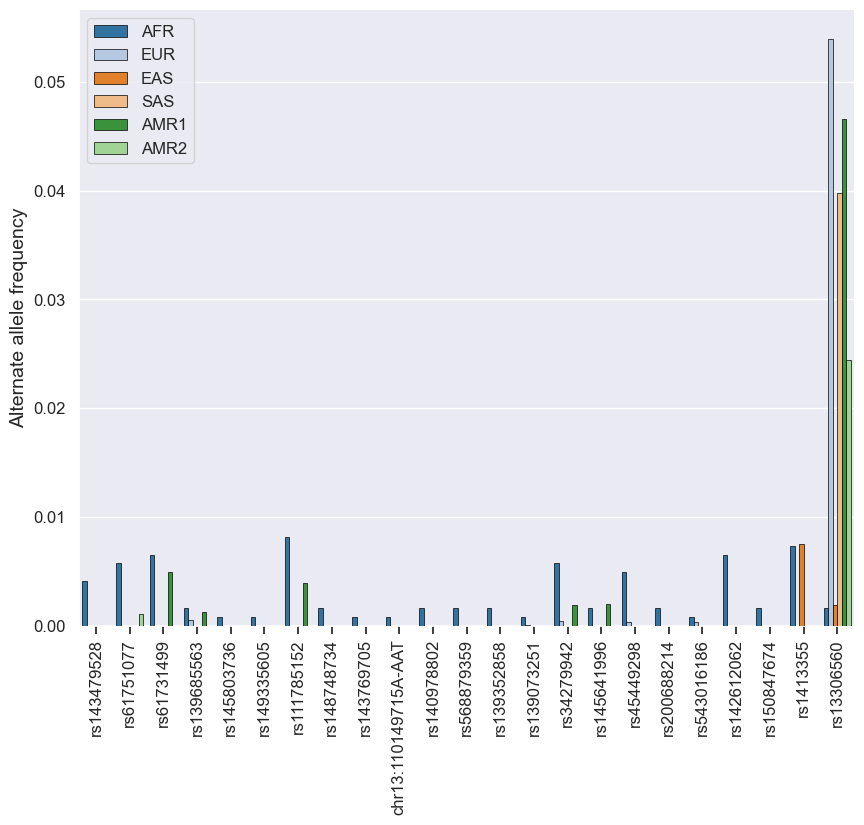

In [238]:
palette = sns.set_palette("tab20", 6)

phenotype_variants_scatterplot = sns.barplot(
    data=rare_variants_with_known_phenotype_scatter_data,
    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100
)
sns.despine()

plt.tick_params(bottom='on')
plt.xticks(rotation=90)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel='Alternate allele frequency')
plt.legend(title = None)

plt.savefig(
    "..\Results\Figures\Rare_disease_causing_global_freq.png", dpi=1200, bbox_inches="tight"
)
plt.show()

### What are the frequencies of the rare variants with known phenotypes and CADD Phred scores >=10 in each African ethnolinguistic population group?

In [239]:
# Get a list of variants to get frequencies for.

rare_deleterious_variants_with_known_phenotype_list = list(rare_deleterious_variants_with_known_phenotype.ID.unique())

In [240]:
# Extract ethnolinguistic population frequencies for each of these variants. 

ih_afr_subpops_rare_deleterious_variants = ih_afr[(ih_afr.ID.isin(rare_deleterious_variants_with_known_phenotype_list)) & ~ (ih_afr.REG == 'Recent African')]

In [241]:
# Filter out irrelevant data. Pivot data.

ih_afr_subpops_rare_deleterious_variants_filtered = ih_afr_subpops_rare_deleterious_variants.drop(columns=['POS','REF','ALT','IH_ALT_CTS','VARIANT_TYPE','REG'])
ih_afr_subpops_rare_deleterious_variants_filtered = ih_afr_subpops_rare_deleterious_variants_filtered.pivot(index=['VAR_NAME'], columns=['SUB_POP'], values=['IH_AF']).reset_index()

In [242]:
# Drop dataframe level

ih_afr_subpops_rare_deleterious_variants_filtered.columns = ih_afr_subpops_rare_deleterious_variants_filtered.columns.get_level_values(1)

# Rename column

ih_afr_subpops_rare_deleterious_variants_filtered = ih_afr_subpops_rare_deleterious_variants_filtered.rename(columns={'':'VAR_NAME'})

In [243]:
# Add overall African frequencies

ih_afr_subpops_rare_deleterious_variants_filtered = pd.merge(left=rare_deleterious_variants_with_known_phenotype_incl_alfa[['VAR_NAME','IH_AF']], right=ih_afr_subpops_rare_deleterious_variants_filtered, how='left', on=['VAR_NAME'])
ih_afr_subpops_rare_deleterious_variants_filtered

,VAR_NAME,IH_AF,Bantu Kenya,Bantu South Africa,Biaka Pygmy,Esan,Luhya,Mandenka,Mandinka,Mbuti Pygmy,Mende,San,Yoruba
0,rs143479528,0.004098,0.00,0.0,0.0,0.014563,0.000000,0.00,0.000000,0.000000,0.012048,0.000000,0.000000
1,rs61751077,0.005738,0.00,0.0,0.0,0.000000,0.000000,0.00,0.008621,0.000000,0.024096,0.000000,0.003623
2,rs61731499,0.006557,0.05,0.0,0.0,0.000000,0.021739,0.00,0.000000,0.000000,0.000000,0.083333,0.007246
3,rs139685563,0.001639,0.00,0.0,0.0,0.000000,0.010870,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,rs145803736,0.000820,0.00,0.0,0.0,0.000000,0.005435,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,rs149335605,0.000820,0.00,0.0,0.0,0.000000,0.005435,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,rs111785152,0.008197,0.00,0.0,0.0,0.000000,0.005435,0.00,0.025862,0.000000,0.018072,0.000000,0.000000
7,rs148748734,0.001639,0.00,0.0,0.0,0.004854,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.003623
8,rs143769705,0.000820,0.00,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.000000,0.000000
9,chr13:110149715A-AAT,0.000825,0.00,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.003623


### Generate a barplot visualising the African ethnolinguistic group frequency differences of rare variants with known phenotypes and deleterious CADD scores 

Unpivot relevant columns to prepare data for plotting

In [244]:
rare_variants_with_known_phenotype_scatter_data_subpops = ih_afr_subpops_rare_deleterious_variants_filtered.melt(id_vars=['VAR_NAME'], value_vars=ih_afr_subpops_rare_deleterious_variants_filtered.iloc[:,4:].columns, var_name='POP', value_name='AF')
rare_variants_with_known_phenotype_scatter_data_subpops.head(5)

,VAR_NAME,POP,AF
0,rs143479528,Biaka Pygmy,0.0
1,rs61751077,Biaka Pygmy,0.0
2,rs61731499,Biaka Pygmy,0.0
3,rs139685563,Biaka Pygmy,0.0
4,rs145803736,Biaka Pygmy,0.0


Generate scatterplot with variant name on x-axis and allele frequency on y-axis for each population group.

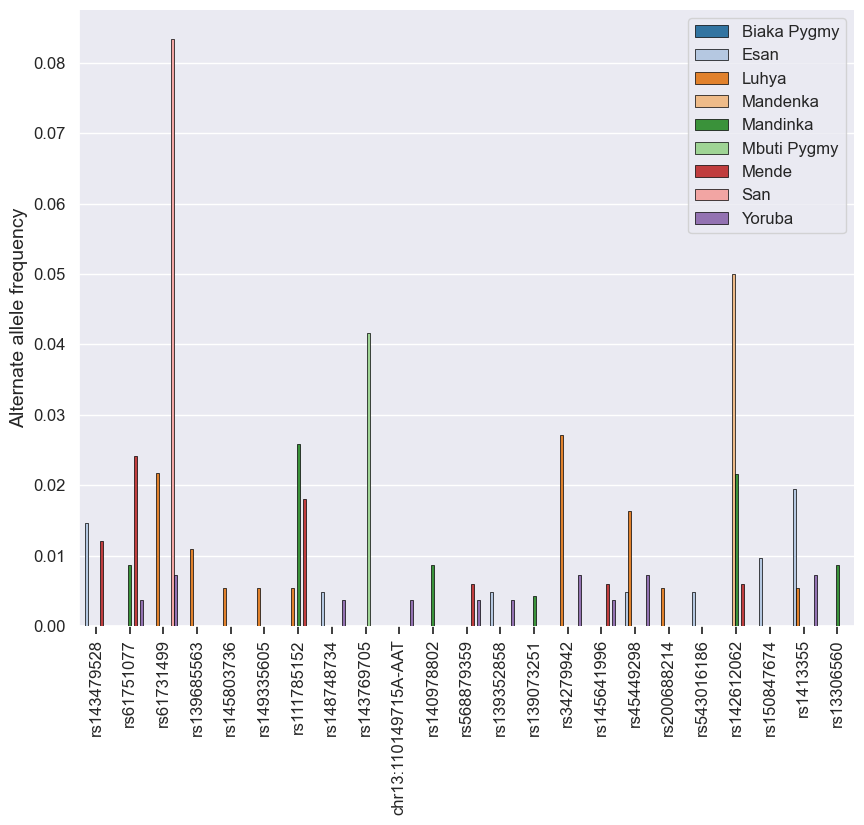

In [245]:
palette = sns.set_palette("tab20", 11)

phenotype_variants_scatterplot = sns.barplot(
    data=rare_variants_with_known_phenotype_scatter_data_subpops,
    x="VAR_NAME",
    y="AF",
    # marker="o",
    hue="POP",
    edgecolor="black",
    # jitter=0.18,
    linewidth=0.5,
    zorder=100
)
sns.despine()

plt.tick_params(bottom='on')
plt.xticks(rotation=90)
plt.xlabel(xlabel=None)
plt.ylabel(ylabel='Alternate allele frequency')
plt.legend(title = None)

plt.savefig(
    "..\Results\Figures\Rare_disease_causing_subpop_freq.png", dpi=1200, bbox_inches="tight"
)
plt.show()

### Generate a table summarising the global frequencies of variants with known phenotypes and their CADD phred scores

In [246]:
# Join the phenotype and cadd data

variants_phenotypes_and_cadd_phred = pd.merge(variants_with_known_phenotypes, vep_data, how='left', on=['ID','CHROM','POS','REF','ALT','GENE'])

In [247]:
# Add ALFA global allele count data to African data in variants_with_known_phenotype dataframe

variants_with_known_phenotype_incl_alfa = pd.merge(variants_phenotypes_and_cadd_phred.drop(columns=['ID']), alfa_global, how='left', on=['VAR_NAME','REF','ALT'])
variants_with_known_phenotype_incl_alfa = variants_with_known_phenotype_incl_alfa.drop(columns=['SUB_POP','IH_ALT_CTS','REG','VARIANT_TYPE','CHROM']).rename(columns={"IH_AF":"AFR_AF","Clndn":"DISEASE_PHENOTYPE"})
variants_with_known_phenotype_incl_alfa

,VAR_NAME,POS,REF,ALT,GENE,AFR_AF,DISEASE_PHENOTYPE,CADD_RAW_SCORE,CADD_PHRED_SCORE,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
0,rs139916479,110149349,G,A,COL4A1,0.004098,Brain_small_vessel_disease_1_with_or_without_o...,0.257986,3.798,0.0,0.0,1.0,0.0,0.0,86.0,9690.0,145.0,610.0,98.0
1,rs139916479,110149349,G,A,COL4A1,0.004098,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",0.257986,3.798,0.0,0.0,1.0,0.0,0.0,86.0,9690.0,145.0,610.0,98.0
2,rs139916479,110149349,G,A,COL4A1,0.004098,Brain_small_vessel_disease_with_hemorrhage,0.257986,3.798,0.0,0.0,1.0,0.0,0.0,86.0,9690.0,145.0,610.0,98.0
3,chr13:110149715A-AAT,110149715,A,AAT,COL4A1,0.000825,Porencephalic_cyst,1.172573,13.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr13:110149715A-AAT,110149715,A,AAT,COL4A1,0.000825,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",1.172573,13.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,rs1801133,11796321,G,A,MTHFR,0.072131,Neoplasm_of_stomach|Gastrointestinal_stromal_t...,4.039767,27.300,1230.0,115812.0,432.0,3277.0,875.0,1954.0,216572.0,1056.0,3961.0,4351.0
269,rs1808593,151011214,G,T,NOS3,0.704098,NaN,0.701752,8.471,462.0,121448.0,540.0,5222.0,156.0,106.0,41382.0,198.0,944.0,34.0
270,rs1800896,206773552,T,C,IL10,0.324302,NaN,0.396866,5.392,193.0,127412.0,403.0,2045.0,1517.0,3001.0,141860.0,727.0,5165.0,3707.0
271,rs1800795,22727026,C,G,IL6,0.999180,"Diabetes_mellitus_type_2,_susceptibility_to|Di...",1.936521,18.770,86.0,8000.0,121.0,500.0,84.0,0.0,6286.0,25.0,110.0,14.0


In [248]:
# Calculate the alternate allele frequencies for the global populations

variants_with_known_phenotype_incl_alfa['ALFA_AF_East Asian'] = variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']/(variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_East Asian']+variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_East Asian'])
variants_with_known_phenotype_incl_alfa['ALFA_AF_South Asian'] = variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']/(variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_South Asian']+variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_South Asian'])
variants_with_known_phenotype_incl_alfa['ALFA_AF_European'] = variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']/(variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_European']+variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_European'])
variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 1'] = variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']/(variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 1']+variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 1'])
variants_with_known_phenotype_incl_alfa['ALFA_AF_Latin American 2'] = variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']/(variants_with_known_phenotype_incl_alfa['ALT_CT_ALFA_Latin American 2']+variants_with_known_phenotype_incl_alfa['REF_CT_ALFA_Latin American 2'])

variants_with_known_phenotype_incl_alfa.drop(columns=['ALT_CT_ALFA_East Asian','ALT_CT_ALFA_South Asian','ALT_CT_ALFA_European','ALT_CT_ALFA_Latin American 1','ALT_CT_ALFA_Latin American 2','REF_CT_ALFA_East Asian','REF_CT_ALFA_South Asian','REF_CT_ALFA_European','REF_CT_ALFA_Latin American 1','REF_CT_ALFA_Latin American 2'], inplace=True)
variants_with_known_phenotype_incl_alfa.head(5)

,VAR_NAME,POS,REF,ALT,GENE,AFR_AF,DISEASE_PHENOTYPE,CADD_RAW_SCORE,CADD_PHRED_SCORE,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2
0,rs139916479,110149349,G,A,COL4A1,0.004098,Brain_small_vessel_disease_1_with_or_without_o...,0.257986,3.798,0.0,0.0,0.0,0.006849,0.0
1,rs139916479,110149349,G,A,COL4A1,0.004098,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",0.257986,3.798,0.0,0.0,0.0,0.006849,0.0
2,rs139916479,110149349,G,A,COL4A1,0.004098,Brain_small_vessel_disease_with_hemorrhage,0.257986,3.798,0.0,0.0,0.0,0.006849,0.0
3,chr13:110149715A-AAT,110149715,A,AAT,COL4A1,0.000825,Porencephalic_cyst,1.172573,13.420,NaN,NaN,NaN,NaN,NaN
4,chr13:110149715A-AAT,110149715,A,AAT,COL4A1,0.000825,"Angiopathy,_hereditary,_with_nephropathy,_aneu...",1.172573,13.420,NaN,NaN,NaN,NaN,NaN


Save results

In [249]:
variants_with_known_phenotype_incl_alfa.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Global_variant_phenotypes.csv",
    ),
    index=False,
)

### Generate a table summarising the African ethnolinguistic group frequencies of variants with known phenotypes and their CADD phred scores

In [250]:
# Get a list of variants to get frequencies for.

variants_with_known_phenotypes_list = list(variants_with_known_phenotypes.ID.unique())

In [251]:
# Extract ethnolinguistic population frequencies for each of these variants. 

ih_afr_subpops_variants = ih_afr[(ih_afr.ID.isin(variants_with_known_phenotypes_list)) & ~ (ih_afr.REG == 'Recent African')]

In [252]:
# Filter out irrelevant data. Pivot data.

ih_afr_subpops_variants_filtered = ih_afr_subpops_variants.drop(columns=['POS','REF','ALT','IH_ALT_CTS','VARIANT_TYPE','REG'])
ih_afr_subpops_variants_filtered = ih_afr_subpops_variants_filtered.pivot(index=['ID','VAR_NAME','GENE'], columns=['SUB_POP'], values=['IH_AF']).reset_index()

In [253]:
# Add overall African frequencies

ih_afr_subpops_variants_filtered = pd.merge(left=variants_with_known_phenotype_incl_alfa, right=ih_afr_subpops_variants_filtered, how='left', on=['VAR_NAME'])
ih_afr_subpops_variants_filtered.drop(variants_with_known_phenotype_incl_alfa.filter(regex='ALFA').columns, axis=1, inplace=True)

Save results

In [254]:
ih_afr_subpops_variants_filtered.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "African_ethnolinguistic_groups_variant_phenotypes.csv",
    ),
    index=False,
)